#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.layers import Dropout
from IPython.display import clear_output
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as express

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DEBI/uottawa1/SC/Project/MCSDatasetNEXTCONLab.csv")

In [ ]:
data

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


#EDA

In [ ]:
# 1 is good 0 is fake

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


#Data preparation

##Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

In [ ]:
X_train

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
180,45.545051,-75.142904,1,15,20,50,30,7,30,0,300312
9867,45.491605,-75.149093,5,5,13,40,10,8,53,0,215855
5216,45.417060,-75.288690,5,11,10,50,10,10,87,0,84462
2218,45.439704,-75.145811,4,22,16,60,60,3,53,0,122016
7539,45.556284,-75.186074,0,21,22,60,20,5,93,0,319075
...,...,...,...,...,...,...,...,...,...,...,...
5191,45.457233,-75.279672,4,15,27,40,30,8,89,0,150151
13418,45.548250,-75.212047,3,21,15,50,30,4,49,0,309688
5390,45.545074,-75.134887,1,17,21,60,40,2,94,0,300313
860,45.471759,-75.289497,2,12,37,40,30,8,67,0,178302


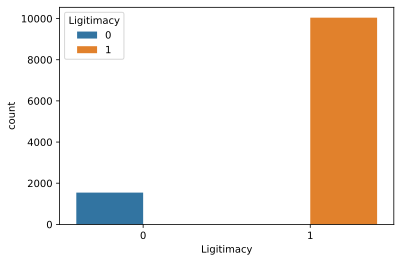

In [ ]:
sns.countplot(x = y_train, hue=y_train)
plt.show()

##Handle Imbalaced data

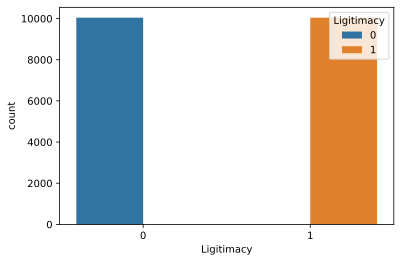

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
over_sample=RandomOverSampler(sampling_strategy='all',random_state=0)
X_train,y_train=over_sample.fit_resample(X_train,y_train)
sns.countplot(x=y_train, hue=y_train)
plt.show()

In [ ]:
X_train

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.545051,-75.142904,1,15,20,50,30,7,30,0,300312
1,45.491605,-75.149093,5,5,13,40,10,8,53,0,215855
2,45.417060,-75.288690,5,11,10,50,10,10,87,0,84462
3,45.439704,-75.145811,4,22,16,60,60,3,53,0,122016
4,45.556284,-75.186074,0,21,22,60,20,5,93,0,319075
...,...,...,...,...,...,...,...,...,...,...,...
20083,45.460915,-75.146316,5,9,8,60,60,9,97,1,159552
20084,45.565895,-75.229900,2,17,10,60,50,9,79,0,337837
20085,45.407659,-75.236636,0,13,19,60,10,9,83,0,65700
20086,45.463302,-75.144910,4,7,30,50,20,4,40,1,159552


#Random Forest Classifire

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Test the model and calculate y_pred
rf_clf_y_pred = rf_clf.predict(X_test)

In [ ]:
#print the accuracy
rf_clf_acc = accuracy_score(y_test,rf_clf_y_pred)
print(rf_clf_acc)

0.9986192613047981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


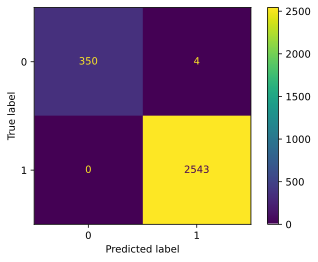

In [ ]:
#plot the confusion amtrix
plot_confusion_matrix(rf_clf,X_test,y_test)
plt.show()

In [ ]:
#show the classification report
print(classification_report(y_test,rf_clf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       354
           1       1.00      1.00      1.00      2543

    accuracy                           1.00      2897
   macro avg       1.00      0.99      1.00      2897
weighted avg       1.00      1.00      1.00      2897



#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(random_state=0)
adb_clf.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
#Test the model and calculate y_pred
adb_clf_y_pred = adb_clf.predict(X_test)

In [ ]:
#print the accuracy
adb_clf_acc = accuracy_score(y_test,adb_clf_y_pred)
print(adb_clf_acc)

0.9247497411114947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


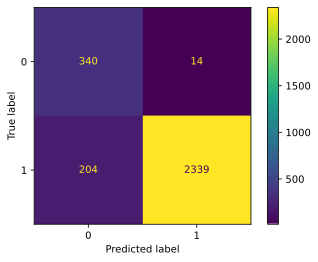

In [ ]:
#plot the confusion amtrix
plot_confusion_matrix(adb_clf,X_test,y_test)

In [ ]:
#show the classification report
print(classification_report(y_test,adb_clf_y_pred))

              precision    recall  f1-score   support

           0       0.62      0.96      0.76       354
           1       0.99      0.92      0.96      2543

    accuracy                           0.92      2897
   macro avg       0.81      0.94      0.86      2897
weighted avg       0.95      0.92      0.93      2897



#Accuracy on Original Data

In [ ]:
x_axis = ['RF', "AdaBoost"]
y_axis = [rf_clf_acc,adb_clf_acc]

Text(0, 0.5, 'Accuracy')

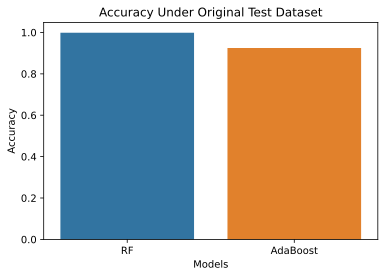

In [ ]:
sns.barplot(y=y_axis,x=x_axis)
plt.title("Accuracy Under Original Test Dataset")  
plt.xlabel("Models")
plt.ylabel("Accuracy")

#GAN

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

dim = X_train.shape[1:]

##Generator

In [ ]:
from keras.layers import Input, Flatten
noise_shape = (100,)

In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
def define_generator():    #latent_dim is the dimension of the latent vector (e.g., 100)
  model = Sequential()
  model.add(Dense(256))#, input_shape=noise_shape
  model.add(LeakyReLU(alpha=.3))
  model.add(BatchNormalization(momentum=.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=.3))
  model.add(BatchNormalization(momentum=.8))
  
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=.3))
  model.add(BatchNormalization(momentum=.8))

  model.add(Dense(np.prod(dim), activation='tanh'))
  model.add(Reshape(dim)) #This is my output layer which should represent my fake generated image

  # model.summary()

  noise = Input(shape=noise_shape)
  fake = model(noise)

  return Model(noise, fake)
  

##Discriminator

In [ ]:
def define_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=dim))

  model.add(Dense(512))
  model.add(LeakyReLU(alpha=.3))
  
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=.3))
  
  model.add(Dense(1, activation='sigmoid'))

  # model.summary()

  fake = Input(shape=dim)
  output = model(fake)

  return Model(fake, output)

##CGAN

In [ ]:
def train(epochs, batch_size, generator, discriminator, combined):
  half_batch = int(batch_size / 2)
  for epoch in range(epochs):

    # train discriminator
    indx = np.random.randint(0, X_train.shape[0], half_batch)
    real = X_train[indx]

    noise = np.random.normal(0, 1, (half_batch, 100))
    gen_data = generator.predict(noise)
    
    d_loss_real = discriminator.train_on_batch(real, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_data, np.zeros((half_batch, 1)))
    d_loss = .5 * np.add(d_loss_real, d_loss_fake)

    # train generator
    noise = np.random.normal(0,1, (batch_size, 100))
    valid_y = np.array([1]*batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)

    #Trace training
    print("epoch ===> %d [Discriminator loss: %f, Discriminator acc.: %.2f%%] [Generator loss: %f]" % (epoch+1, d_loss[0], 100*d_loss[1], g_loss))

In [ ]:
discriminator = define_discriminator()
generator = define_generator()

discriminator.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
generator.compile(loss="binary_crossentropy", optimizer= "adam")

In [ ]:
z = Input(shape=(100,))
gen = generator(z)

discriminator.trainable = False

valid = discriminator(gen)

combined = Model(z, valid)
combined.compile(loss="binary_crossentropy", optimizer= "adam")

train(1000, 32, generator, discriminator, combined)

epoch ===> 1 [Discriminator loss: 0.645599, Discriminator acc.: 65.62%] [Generator loss: 0.595212]
epoch ===> 2 [Discriminator loss: 0.500159, Discriminator acc.: 75.00%] [Generator loss: 0.582123]
epoch ===> 3 [Discriminator loss: 0.448600, Discriminator acc.: 78.12%] [Generator loss: 0.708320]
epoch ===> 4 [Discriminator loss: 0.410914, Discriminator acc.: 75.00%] [Generator loss: 0.821500]
epoch ===> 5 [Discriminator loss: 0.336556, Discriminator acc.: 81.25%] [Generator loss: 1.006037]
epoch ===> 6 [Discriminator loss: 0.407916, Discriminator acc.: 84.38%] [Generator loss: 1.428120]
epoch ===> 7 [Discriminator loss: 0.297274, Discriminator acc.: 84.38%] [Generator loss: 1.386966]
epoch ===> 8 [Discriminator loss: 0.213022, Discriminator acc.: 90.62%] [Generator loss: 1.447303]
epoch ===> 9 [Discriminator loss: 0.211918, Discriminator acc.: 93.75%] [Generator loss: 1.958833]
epoch ===> 10 [Discriminator loss: 0.139484, Discriminator acc.: 96.88%] [Generator loss: 2.255309]
epoch ===

##Generate a fake image (An example)

In [ ]:
new_fake = generator.predict(np.random.normal(0, 1, (1000, 100)))
pd.DataFrame(new_fake)

,0,1,2,3,4,5,6,7,8,9,10
0,0.424204,0.193653,0.528945,0.398536,0.392913,0.785124,0.230174,0.499959,0.353489,0.133535,0.287716
1,0.676474,-0.509334,0.663968,0.501752,0.572011,0.991176,0.333790,0.546852,0.490852,0.480879,0.527485
2,0.936496,0.999372,-0.075004,0.791302,0.709699,0.490659,0.012314,0.731578,0.914121,0.830988,0.960089
3,0.816308,0.951461,0.297202,0.444355,0.380502,-0.150815,-0.011785,0.386562,0.385912,0.344035,0.851899
4,0.539058,-0.153618,0.655398,0.384095,0.470981,0.959788,0.302085,0.433047,0.374515,0.312240,0.363565
...,...,...,...,...,...,...,...,...,...,...,...
995,0.727815,0.934122,0.350362,0.528730,0.491335,0.007725,0.085379,0.501413,0.546505,0.477239,0.790830
996,0.625380,-0.323273,0.629217,0.430658,0.431191,0.974010,0.171944,0.641375,0.472749,0.435277,0.501840
997,0.830489,-0.720187,0.729115,0.532258,0.644379,0.999073,0.432268,0.651421,0.543266,0.678723,0.675513
998,0.656070,0.784560,0.473105,0.542826,0.459393,0.578809,0.196579,0.646357,0.482634,0.209317,0.618069


In [ ]:
new_fake = pd.DataFrame(scaler.inverse_transform(new_fake), columns=list(data.columns[1:-1]))
d = new_fake.iloc[:, 2:].round(decimals = 0).abs().astype('int32')
for col in d.columns:
  new_fake[col] = d[col]
new_fake

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
0,45.458534,-75.286636,3,9,23,49,22,5,55,0,101336
1,45.513802,-75.459000,4,12,34,60,27,6,64,0,193587
2,45.570766,-75.089073,0,18,42,35,11,8,94,1,360032
3,45.544434,-75.100815,2,10,22,2,9,4,57,0,318406
4,45.483696,-75.371780,4,9,28,58,25,5,56,0,130519
...,...,...,...,...,...,...,...,...,...,...,...
995,45.525047,-75.105064,2,12,29,10,14,6,68,0,294910
996,45.502605,-75.413383,4,10,25,59,19,7,63,0,183721
997,45.547543,-75.510704,4,12,38,60,32,7,68,1,250541
998,45.509331,-75.141739,3,12,27,39,20,7,64,0,228440


#Mixed Test Data

In [ ]:
x_test = pd.DataFrame(X_test, columns=list(data.columns[1:-1]))
X_mixed_test = pd.concat([x_test, new_fake])
X_mixed_test

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber
14442,45.555383,-75.174857,5,1,40,20,10,2,30,0,319076
9285,45.541153,-75.270451,0,18,5,40,20,4,84,0,300296
2366,45.529620,-75.284885,0,19,31,50,40,4,62,0,281526
3325,45.449629,-75.291607,3,7,49,30,30,7,77,1,140766
169,45.515466,-75.294039,4,7,24,60,50,2,59,1,253373
...,...,...,...,...,...,...,...,...,...,...,...
995,45.525047,-75.105064,2,12,29,10,14,6,68,0,294910
996,45.502605,-75.413383,4,10,25,59,19,7,63,0,183721
997,45.547543,-75.510704,4,12,38,60,32,7,68,1,250541
998,45.509331,-75.141739,3,12,27,39,20,7,64,0,228440


In [ ]:
l = list(y_test)
l.extend([0]*1000)
y_mixed_test = l
y_mixed_test = np.array(y_mixed_test)

#RF and AdaBoost on Mixed data 

In [ ]:
rf_clf_y_pred = rf_clf.predict(X_mixed_test)
rf_clf_acc = accuracy_score(y_mixed_test,rf_clf_y_pred)
clear_output()
rf_clf_acc

0.7428791377983064

In [ ]:
adb_clf_y_pred = adb_clf.predict(X_mixed_test)
adb_clf_acc = accuracy_score(y_mixed_test,adb_clf_y_pred)
clear_output()
adb_clf_acc

0.6984860148832435

#Accuracy on Mixed Data

In [ ]:
x_axis = ['RF', "AdaBoost"]
y_axis = [rf_clf_acc,adb_clf_acc]

Text(0, 0.5, 'Accuracy')

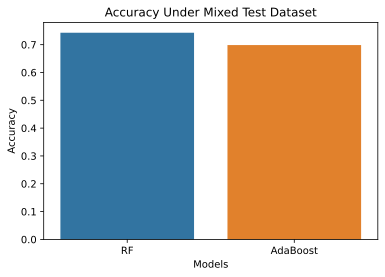

In [ ]:
sns.barplot(y=y_axis,x=x_axis)
plt.title("Accuracy Under Mixed Test Dataset")
plt.xlabel("Models")
plt.ylabel("Accuracy")

#Two layer Classification

##First Layer

In [ ]:
pred = discriminator.predict(scaler.transform(X_mixed_test))
pred = ((pred>=.5)*1).reshape((-1))
pred.shape

(3897,)

In [ ]:
X_mixed_test['Ligitimacy'] = y_mixed_test
X_mixed_test['pred'] = pred

In [ ]:
filtered_test1 = X_mixed_test[X_mixed_test.pred==0]
filtered_test2 = X_mixed_test[X_mixed_test.pred==1]

In [ ]:
filtered_test1

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy,pred
12581,45.403858,-75.288047,3,16,9,30,30,2,41,0,56310,1,0
3889,45.545821,-75.105832,4,17,46,60,20,3,67,0,309701,1,0
13086,45.386611,-75.136226,0,13,53,50,50,6,32,0,28177,1,0
5769,45.393037,-75.123111,5,13,39,50,40,10,54,0,37563,1,0
10751,45.416248,-75.216842,4,1,18,40,40,2,48,0,84471,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,45.554169,-75.089996,2,15,34,39,18,4,92,1,338206,0,0
927,45.584663,-75.088913,5,23,54,52,18,10,100,1,375382,0,0
929,45.547947,-75.092323,1,12,23,4,12,5,86,1,333842,0,0
944,45.570839,-75.089531,1,14,33,6,7,6,93,1,358599,0,0


In [ ]:
filtered_test1.pred.unique()

array([0])

In [ ]:
filtered_test2

,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy,pred
14442,45.555383,-75.174857,5,1,40,20,10,2,30,0,319076,1,1
9285,45.541153,-75.270451,0,18,5,40,20,4,84,0,300296,1,1
2366,45.529620,-75.284885,0,19,31,50,40,4,62,0,281526,1,1
3325,45.449629,-75.291607,3,7,49,30,30,7,77,1,140766,1,1
169,45.515466,-75.294039,4,7,24,60,50,2,59,1,253373,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45.525047,-75.105064,2,12,29,10,14,6,68,0,294910,0,1
996,45.502605,-75.413383,4,10,25,59,19,7,63,0,183721,0,1
997,45.547543,-75.510704,4,12,38,60,32,7,68,1,250541,0,1
998,45.509331,-75.141739,3,12,27,39,20,7,64,0,228440,0,1


In [ ]:
filtered_test2.pred.unique()

array([1])

##Second Layer

In [ ]:
y_actual = list(filtered_test1.Ligitimacy)
y_actual.extend(list(filtered_test2.Ligitimacy))
y_actual = np.array(y_actual)

###RF and AdaBoost on Discriminant-Filtered data 

In [ ]:
rf_clf_y_pred = rf_clf.predict(filtered_test2.iloc[:, :-2])

y_pred = list(filtered_test1.pred)
y_pred.extend(rf_clf_y_pred)
y_pred = np.array(y_pred)

rf_clf_acc = accuracy_score(y_actual,y_pred)

clear_output()
rf_clf_acc

0.657685399024891

In [ ]:
adb_clf_y_pred = adb_clf.predict(filtered_test2.iloc[:, :-2])

y_pred = list(filtered_test1.pred)
y_pred.extend(adb_clf_y_pred)
y_pred = np.array(y_pred)

adb_clf_acc = accuracy_score(y_actual,y_pred)

clear_output()
adb_clf_acc

0.6168847831665384

###Accuracy for Cascade frame work

In [ ]:
x_axis = ['RF-Based Cascade', "AdaBoost-Based Cascade"]
y_axis = [rf_clf_acc,adb_clf_acc]

Text(0, 0.5, 'Accuracy')

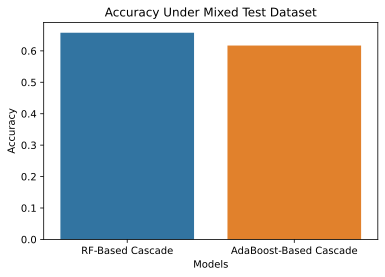

In [ ]:
sns.barplot(y=y_axis,x=x_axis)
plt.title("Accuracy Under Mixed Test Dataset")
plt.xlabel("Models")
plt.ylabel("Accuracy")